# Introduction 

In this project, I perform data exploration and cleaning to better understand the dataset of the Brazilian **National High School Exam - 2019  (ENEM)** and confirm some hypotheses I have about it.
The dataset contains information about the grades obtained by Brazilian students on various subjects, as well as the demographics and socioeconomic status of these students.

In [1]:
import pandas as pd

In [106]:
import matplotlib.pyplot as plt

In [7]:
columns= ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002','NU_INSCRICAO','CO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE','TP_SEXO','TP_COR_RACA','TP_ESCOLA','Q025']

In [8]:
dfEnem = pd.read_csv("MICRODADOS_ENEM_2019.csv", sep=";", encoding='ISO-8859-1', usecols = columns)

In [9]:
dfEnem.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q025
0,190001595656,3552205,Sorocaba,35,SP,36.0,M,3,1,NaN,NaN,B,B,B
1,190001421546,2910800,Feira de Santana,29,BA,23.0,M,1,1,NaN,NaN,C,E,B
2,190001133210,2304400,Fortaleza,23,CE,39.0,F,3,1,NaN,NaN,E,E,B
3,190001199383,1721000,Palmas,17,TO,25.0,F,1,1,392.0,460.0,C,E,B
4,190001237802,3118601,Contagem,31,MG,22.0,F,1,1,677.0,860.0,E,E,B


In [10]:
dfEnem.columns.values

array(['NU_INSCRICAO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q025'], dtype=object)

In [11]:
column_city_residency = dfEnem['NO_MUNICIPIO_RESIDENCIA']

In [13]:
column_city_residency.value_counts()

São Paulo                   229837
Rio de Janeiro              137762
Brasília                     94352
Fortaleza                    93959
Salvador                     88557
                             ...  
Canudos do Vale                  9
Monte Santo do Tocantins         9
Sério                            8
Araguainha                       6
Forquetinha                      5
Name: NO_MUNICIPIO_RESIDENCIA, Length: 5299, dtype: int64

In [14]:
column_num_age = dfEnem['NU_IDADE']

In [19]:
column_num_age.value_counts().sort_index()

10.0       6
11.0       9
12.0      46
13.0     266
14.0    5267
        ... 
87.0       1
88.0       1
91.0       2
92.0       1
94.0       1
Name: NU_IDADE, Length: 82, dtype: int64

<AxesSubplot:>

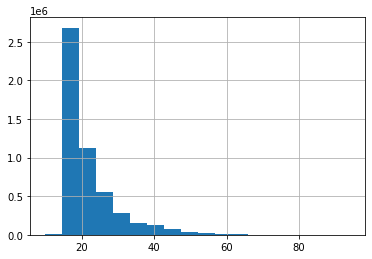

In [29]:
column_num_age.hist(bins=18)

In [30]:
column_sg_uf_residencia = dfEnem['SG_UF_RESIDENCIA']

In [32]:
column_sg_uf_residencia.value_counts()

SP    813772
MG    538896
BA    398095
RJ    338710
CE    295870
PA    281518
PE    271727
MA    219673
RS    218763
PR    210080
GO    170147
PB    147780
PI    121181
RN    119179
AM    118087
SC    109515
ES    102435
DF     94352
AL     91707
MT     88349
SE     75895
MS     70157
RO     58885
TO     47181
AP     42140
AC     38229
RR     12947
Name: SG_UF_RESIDENCIA, dtype: int64

<AxesSubplot:>

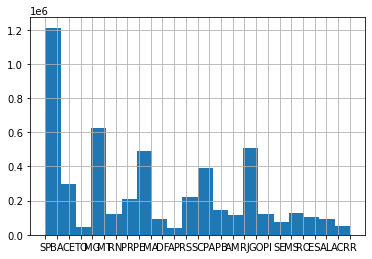

In [36]:
column_sg_uf_residencia.hist(bins=20)

In [42]:
selectedColumns = ['TP_SEXO','NU_NOTA_REDACAO']

In [44]:
column_TP_SEX_N_REDACAO = dfEnem.filter(items=selectedColumns)

In [45]:
column_TP_SEX_N_REDACAO.head()

,TP_SEXO,NU_NOTA_REDACAO
0,M,NaN
1,M,NaN
2,F,NaN
3,F,460.0
4,F,860.0


In [46]:
column_TP_SEX_N_REDACAO = column_TP_SEX_N_REDACAO.dropna()

In [47]:
column_TP_SEX_N_REDACAO.head()

,TP_SEXO,NU_NOTA_REDACAO
3,F,460.0
4,F,860.0
5,M,800.0
6,F,600.0
9,M,400.0


In [48]:
column_TP_SEX_N_REDACAO.groupby('TP_SEXO').count()

,NU_NOTA_REDACAO
TP_SEXO,
F,2336431
M,1586713


In [50]:
column_TP_SEX_N_REDACAO.groupby('TP_SEXO').describe()

NU_NOTA_REDACAO                                                    \
                  count        mean         std  min    25%    50%    75%   
TP_SEXO                                                                     
F             2336431.0  577.159368  187.536483  0.0  480.0  580.0  680.0   
M             1586713.0  562.396035  190.214499  0.0  480.0  580.0  660.0   

                 
            max  
TP_SEXO          
F        1000.0  
M        1000.0

TP_SEXO
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
M    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

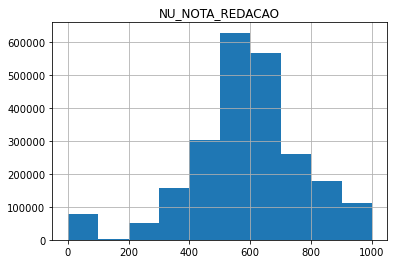

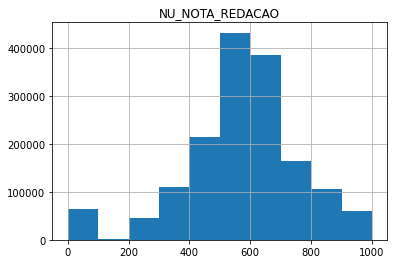

In [51]:
column_TP_SEX_N_REDACAO.groupby('TP_SEXO').hist()

In [56]:
column_TP_SEX_N_REDACAO.groupby('TP_SEXO').mean()

,NU_NOTA_REDACAO
TP_SEXO,
F,577.159368
M,562.396035


In [58]:
selectedColumns = ['NU_INSCRICAO','NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']

In [79]:
dfEnemSelected = dfEnem.filter(items=selectedColumns)

In [80]:
dfEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001595656,NaN,NaN,B,B
1,190001421546,NaN,NaN,C,E
2,190001133210,NaN,NaN,E,E
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E


In [81]:
dfEnemSelected = dfEnemSelected.dropna()

In [82]:
dfEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E
5,190001782198,675.3,800.0,B,B
6,190001421548,594.7,600.0,E,B
9,190001592266,480.7,400.0,E,E


In [83]:
q001andq002dictionary = {
'A': 'Nunca estudou',
'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
'G': 'Completou a Pós-graduação',
'H': 'Não sei'
}

In [84]:
dfEnemSelected.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,186186
B,752563
C,515785
D,433193
E,1006255
F,308319
G,193529
H,306177


In [85]:
dfEnemSelected.Q001

3          C
4          E
5          B
6          E
9          E
          ..
5095257    B
5095259    A
5095260    E
5095263    H
5095264    H
Name: Q001, Length: 3702007, dtype: object

In [87]:
dfEnemSelected['ANSWER_Q001'] = [q001andq002dictionary[resp] for resp in dfEnemSelected.Q001]

In [88]:
dfEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,ANSWER_Q001
3,190001199383,392.0,460.0,C,E,"Completou a 4ª série/5º ano, mas não completou..."
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ..."
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ..."


In [89]:
dfEnemSelected['ANSWER_Q002'] = [q001andq002dictionary[resp] for resp in dfEnemSelected.Q002]

In [90]:
dfEnemSelected.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,ANSWER_Q001,ANSWER_Q002
3,190001199383,392.0,460.0,C,E,"Completou a 4ª série/5º ano, mas não completou...","Completou o Ensino Médio, mas não completou a ..."
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4ª série/5º ano do Ensino Fund...
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


In [91]:
dfEnemSelected.filter(items=['NU_INSCRICAO','ANSWER_Q001']).groupby('ANSWER_Q001').count().sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
ANSWER_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1006255
Não completou a 4ª série/5º ano do Ensino Fundamental,752563
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515785
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",433193
"Completou a Faculdade, mas não completou a Pós-graduação",308319
Não sei,306177
Completou a Pós-graduação,193529
Nunca estudou,186186


In [92]:
dfEnemSelected.filter(items=['NU_INSCRICAO','ANSWER_Q002']).groupby('ANSWER_Q002').count().sort_values(by='NU_INSCRICAO',ascending=False)

,NU_INSCRICAO
ANSWER_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1234774
Não completou a 4ª série/5º ano do Ensino Fundamental,551516
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",475782
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",471827
"Completou a Faculdade, mas não completou a Pós-graduação",416291
Completou a Pós-graduação,333159
Nunca estudou,121022
Não sei,97636


In [98]:
dfEnemSelected.filter(items=['NU_NOTA_MT','ANSWER_Q001']).groupby('ANSWER_Q001').mean().sort_values(by='NU_NOTA_MT',ascending=False)

,NU_NOTA_MT
ANSWER_Q001,
Completou a Pós-graduação,624.118011
"Completou a Faculdade, mas não completou a Pós-graduação",600.305733
"Completou o Ensino Médio, mas não completou a Faculdade",538.924218
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",515.746985
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",505.398424
Não sei,495.478053
Não completou a 4ª série/5º ano do Ensino Fundamental,486.456585
Nunca estudou,466.098351


In [99]:
dfEnemSelected.filter(items=['NU_NOTA_MT','ANSWER_Q002']).groupby('ANSWER_Q002').mean().sort_values(by='NU_NOTA_MT',ascending=False)

,NU_NOTA_MT
ANSWER_Q002,
Completou a Pós-graduação,598.916796
"Completou a Faculdade, mas não completou a Pós-graduação",583.324021
"Completou o Ensino Médio, mas não completou a Faculdade",528.317356
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",505.045830
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",496.050296
Não sei,484.997643
Não completou a 4ª série/5º ano do Ensino Fundamental,480.071887
Nunca estudou,459.859393


In [103]:
mom_math_grade = dfEnemSelected.filter(items=['NU_NOTA_MT','ANSWER_Q002']).groupby('ANSWER_Q002').mean().sort_values(by='NU_NOTA_MT',ascending=False)

<AxesSubplot:xlabel='ANSWER_Q002'>

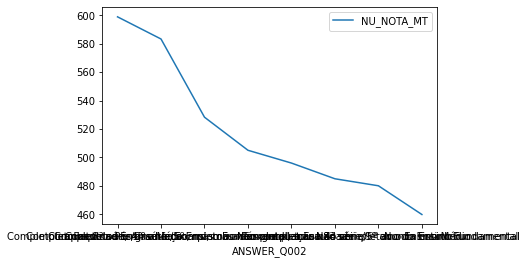

In [104]:
mom_math_grade.plot()

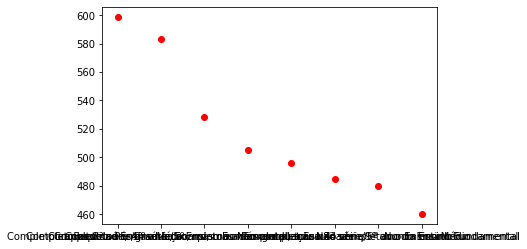

In [107]:
plt.plot(mom_math_grade , "ro")

Text(0.05, 0.7, 'A : Nunca estudou\nB : Não completou a 4ª série/5º ano do Ensino Fundamental\nC : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental\nD : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio\nE : Completou o Ensino Médio, mas não completou a Faculdade\nF : Completou a Faculdade, mas não completou a Pós-graduação\nG : Completou a Pós-graduação\nH : Não sei\n')

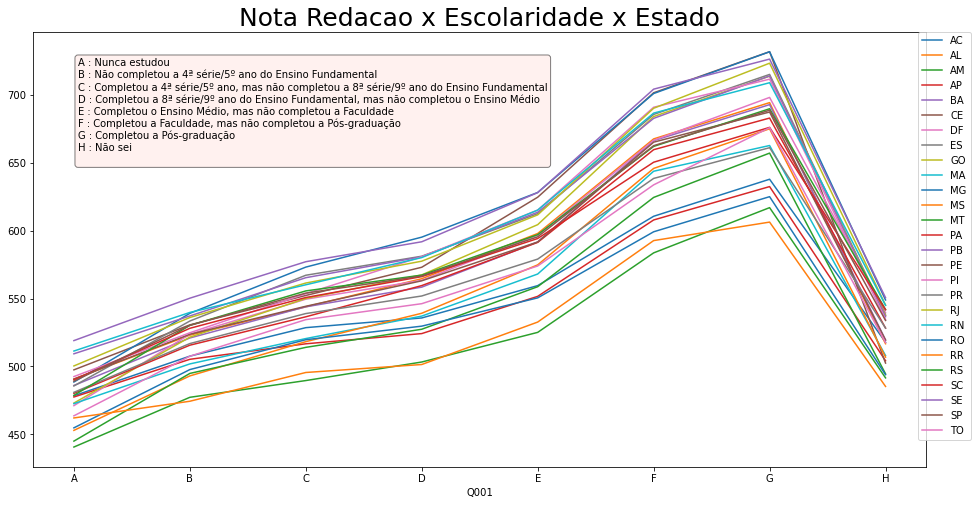

In [108]:
ax = dfEnem.filter(items=['SG_UF_RESIDENCIA','Q001','NU_NOTA_REDACAO'])\
.groupby(['Q001','SG_UF_RESIDENCIA'])\
.mean().sort_values(by='NU_NOTA_REDACAO', ascending=False)\
.unstack().plot(figsize = (16,8))

ax.set_title('Student essay grade x Father schooling level in each state', fontsize= 25)
ax.legend(bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0.)

handles, labels = ax.get_legend_handles_labels()
# print(labels)


import re
edited_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
ax.legend(edited_labels, bbox_to_anchor=(1.05,1), loc=0, borderaxespad=0.)


textdictQ002 = ""
for key,value in q001andq002dictionary.items():
    textdictQ002 = textdictQ002 + "{k} : {v}\n".format(k=key,v=value)

ax.text(0.05,.7, textdictQ002, transform=ax.transAxes, fontsize=10,color='black',
       bbox={'boxstyle':'round', 'facecolor':'mistyrose', 'alpha':0.5})

